In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
NVDA= pd.read_csv('NVDA.csv')
Bitcoin = pd.read_csv('BTC-USD.csv')
Euro = pd.read_csv('EURUSD=X.csv')
AAPL = pd.read_csv('AAPL.csv')

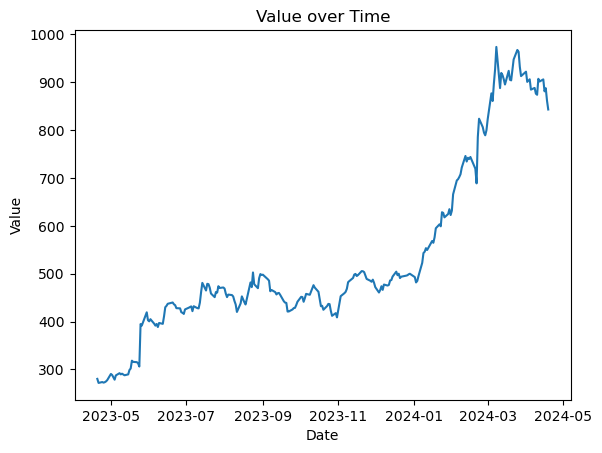

In [3]:
NVDA['Date'] = pd.to_datetime(NVDA['Date'])
# Create a line chart
plt.plot(NVDA['Date'], NVDA['High'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over Time')
plt.show()

In [6]:
#default
#80% decreasing after 

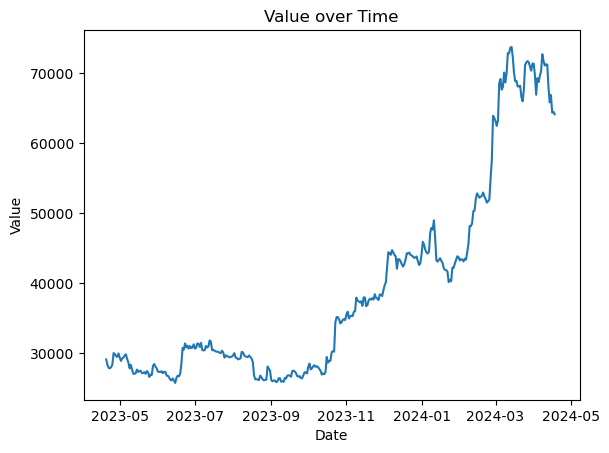

In [48]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])
# Create a line chart
plt.plot(Bitcoin['Date'], Bitcoin['High'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over Time')
plt.show()

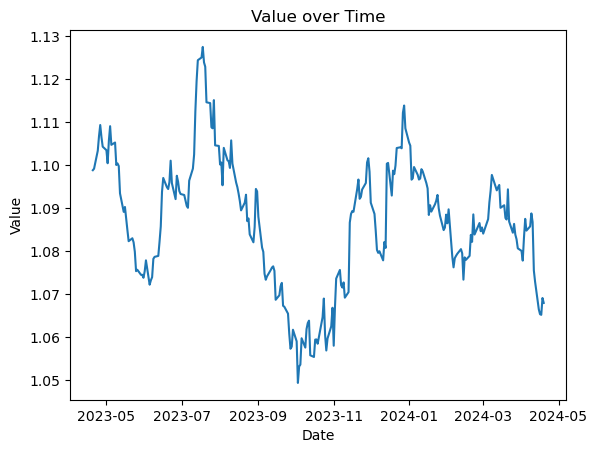

In [40]:
Euro['Date'] = pd.to_datetime(Euro['Date'])
# Create a line chart
plt.plot(Euro['Date'], Euro['High'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over Time')
plt.show()

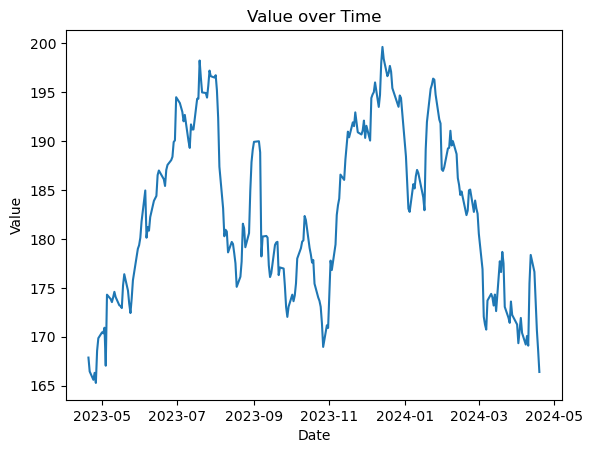

In [8]:
AAPL['Date'] = pd.to_datetime(AAPL['Date'])
# Create a line chart
plt.plot(AAPL['Date'], AAPL['High'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over Time')
plt.show()

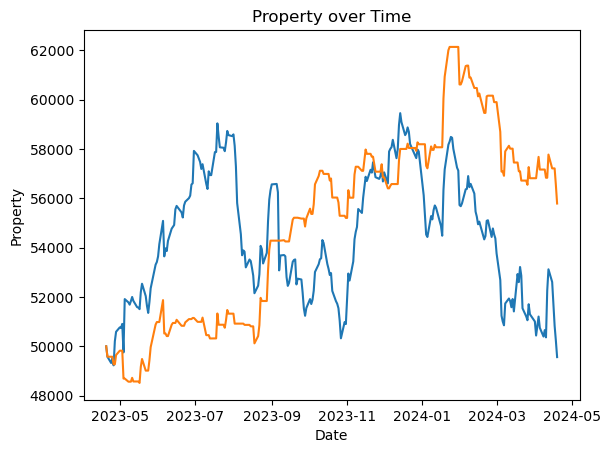

In [57]:
n = len(AAPL)
prt_allin = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_kelly = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_allin.loc[0, 'Property'] = 50000.0
prt_kelly.loc[0, 'Property'] = 50000.0
inc = 0
dec = 0
pos_ret = 0.0
neg_ret = 0.0

for i in range(n - 1):
    prt_allin.loc[i + 1, 'Property'] = prt_allin.loc[i, 'Property'] / AAPL['High'][i] * AAPL['High'][i + 1]
    if (prt_allin.loc[i + 1, 'Property'] < 0.1 * prt_allin.loc[0, 'Property']):
        prt_allin.loc[i + 1, 'Property'] = 0

prt_kelly.loc[1, 'Property'] = prt_kelly.loc[0, 'Property'] / AAPL['High'][0] * AAPL['High'][1]
for i in range(n - 2):
    if (AAPL['High'][i + 1] >  AAPL['High'][i]):
        inc = inc + 1
        dec = 0
        pos_ret = (AAPL['High'][i + 1] -  AAPL['High'][i]) / AAPL['High'][i]
        if (inc < 3):
            pos_p = 1
            neg_p = 0
        else:
            pos_p = 0.45
            neg_p = 0.55
    else:
        dec = dec + 1
        inc = 0
        neg_ret = (AAPL['High'][i] -  AAPL['High'][i + 1]) / AAPL['High'][i]
        if (dec < 3):
            pos_p = 0
            neg_p = 1
        else:
            pos_p = 0.8
            neg_p = 0.2
    if (pos_ret == 0):
        pos_ret = neg_ret
    if (neg_ret == 0):
        neg_ret = pos_ret
    f = (pos_p * pos_ret - neg_p * neg_ret) / (pos_ret * neg_ret)
    if (f > 1):
        f = 1
    if (f < 0):
        f = 0
    prt_kelly.loc[i + 2, 'Property'] = prt_kelly.loc[i + 1, 'Property'] * (1 - f) + prt_kelly.loc[i + 1, 'Property'] * f / AAPL['High'][i + 1] * AAPL['High'][i + 2]
    if (prt_kelly.loc[i + 2, 'Property'] < 0.1 * prt_kelly.loc[0, 'Property']):
        prt_kelly.loc[i + 2, 'Property'] = 0
        
# Create a line chart
plt.plot(AAPL['Date'], prt_allin['Property'])
plt.plot(AAPL['Date'], prt_kelly['Property'])
plt.xlabel('Date')
plt.ylabel('Property')
plt.title('Property over Time')
plt.show()

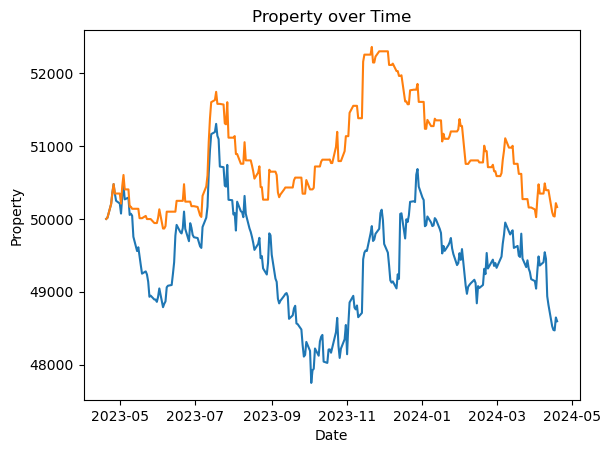

In [58]:
n = len(Euro)
prt_allin = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_kelly = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_allin.loc[0, 'Property'] = 50000.0
prt_kelly.loc[0, 'Property'] = 50000.0
inc = 0
dec = 0
pos_ret = 0.0
neg_ret = 0.0

for i in range(n - 1):
    prt_allin.loc[i + 1, 'Property'] = prt_allin.loc[i, 'Property'] / Euro['High'][i] * Euro['High'][i + 1]
    if (prt_allin.loc[i + 1, 'Property'] < 0.1 * prt_allin.loc[0, 'Property']):
        prt_allin.loc[i + 1, 'Property'] = 0

prt_kelly.loc[1, 'Property'] = prt_kelly.loc[0, 'Property'] / Euro['High'][0] * Euro['High'][1]
for i in range(n - 2):
    if (Euro['High'][i + 1] >  Euro['High'][i]):
        inc = inc + 1
        dec = 0
        pos_ret = (Euro['High'][i + 1] -  Euro['High'][i]) / Euro['High'][i]
        if (inc < 3):
            pos_p = 1
            neg_p = 0
        else:
            pos_p = 0.45
            neg_p = 0.55
    else:
        dec = dec + 1
        inc = 0
        neg_ret = (Euro['High'][i] -  Euro['High'][i + 1]) / Euro['High'][i]
        if (dec < 3):
            pos_p = 0
            neg_p = 1
        else:
            pos_p = 0.8
            neg_p = 0.2
    if (pos_ret == 0):
        pos_ret = neg_ret
    if (neg_ret == 0):
        neg_ret = pos_ret
    f = (pos_p * pos_ret - neg_p * neg_ret) / (pos_ret * neg_ret)
    if (f > 1):
        f = 1
    if (f < 0):
        f = 0
    prt_kelly.loc[i + 2, 'Property'] = prt_kelly.loc[i + 1, 'Property'] * (1 - f) + prt_kelly.loc[i + 1, 'Property'] * f / Euro['High'][i + 1] * Euro['High'][i + 2]
    if (prt_kelly.loc[i + 2, 'Property'] < 0.1 * prt_kelly.loc[0, 'Property']):
        prt_kelly.loc[i + 2, 'Property'] = 0
        
# Create a line chart
plt.plot(Euro['Date'], prt_allin['Property'])
plt.plot(Euro['Date'], prt_kelly['Property'])
plt.xlabel('Date')
plt.ylabel('Property')
plt.title('Property over Time')
plt.show()

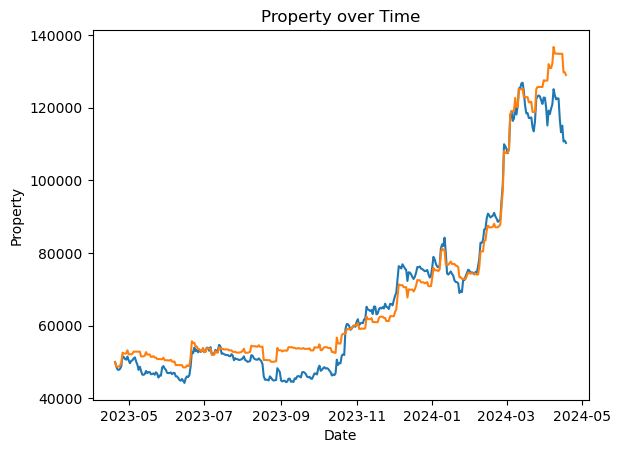

In [59]:
n = len(Bitcoin)
prt_allin = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_kelly = pd.DataFrame(np.arange(n).reshape((n,1)), columns=['Property'])
prt_allin.loc[0, 'Property'] = 50000.0
prt_kelly.loc[0, 'Property'] = 50000.0
inc = 0
dec = 0
pos_ret = 0.0
neg_ret = 0.0

for i in range(n - 1):
    prt_allin.loc[i + 1, 'Property'] = prt_allin.loc[i, 'Property'] / Bitcoin['High'][i] * Bitcoin['High'][i + 1]
    if (prt_allin.loc[i + 1, 'Property'] < 0.1 * prt_allin.loc[0, 'Property']):
        prt_allin.loc[i + 1, 'Property'] = 0

prt_kelly.loc[1, 'Property'] = prt_kelly.loc[0, 'Property'] / Bitcoin['High'][0] * Bitcoin['High'][1]
for i in range(n - 2):
    if (Bitcoin['High'][i + 1] >  Bitcoin['High'][i]):
        inc = inc + 1
        dec = 0
        pos_ret = (Bitcoin['High'][i + 1] -  Bitcoin['High'][i]) / Bitcoin['High'][i]
        if (inc < 3):
            pos_p = 1
            neg_p = 0
        else:
            pos_p = 0.45
            neg_p = 0.55
    else:
        dec = dec + 1
        inc = 0
        neg_ret = (Bitcoin['High'][i] -  Bitcoin['High'][i + 1]) / Bitcoin['High'][i]
        if (dec < 3):
            pos_p = 0
            neg_p = 1
        else:
            pos_p = 0.8
            neg_p = 0.2
    if (pos_ret == 0):
        pos_ret = neg_ret
    if (neg_ret == 0):
        neg_ret = pos_ret
    f = (pos_p * pos_ret - neg_p * neg_ret) / (pos_ret * neg_ret)
    if (f > 1):
        f = 1
    if (f < 0):
        f = 0
    prt_kelly.loc[i + 2, 'Property'] = prt_kelly.loc[i + 1, 'Property'] * (1 - f) + prt_kelly.loc[i + 1, 'Property'] * f / Bitcoin['High'][i + 1] * Bitcoin['High'][i + 2]
    if (prt_kelly.loc[i + 2, 'Property'] < 0.1 * prt_kelly.loc[0, 'Property']):
        prt_kelly.loc[i + 2, 'Property'] = 0
        
# Create a line chart
plt.plot(Bitcoin['Date'], prt_allin['Property'])
plt.plot(Bitcoin['Date'], prt_kelly['Property'])
plt.xlabel('Date')
plt.ylabel('Property')
plt.title('Property over Time')
plt.show()